In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from udpclust.UDP_modules import dp_clustering as fdp
from udpclust import UDPClust as dp

In [3]:
fname="../test/DATA/traj-d.dat"
dim=6

In [4]:
traj=[]
for line in open(fname,'r'):
    traj.append([float(x) for x in line.split()])
traj=np.array(traj)
                                                                                                                                                                                   
print('shape of input array =',traj.shape)

shape of input array = (5096, 23)


In [5]:
maxknn=496
from scipy.spatial import distance
from scipy.spatial import cKDTree

tree=cKDTree(traj)
dmat,Nlist=tree.query(traj,k=maxknn+1,n_jobs=-1)

Nlist=Nlist[:,1:]
dmat=dmat[:,1:]
Nlist+=1

In [20]:
dmat

array([[ 0.42873531,  0.43878887,  0.448116  , ...,  0.83514329,
         0.83518427,  0.83562228],
       [ 0.34576518,  0.41605025,  0.43449768, ...,  0.71045077,
         0.71090642,  0.71091057],
       [ 0.46370058,  0.53348637,  0.53520457, ...,  0.88748358,
         0.88767014,  0.88773194],
       ..., 
       [ 4.38230363,  5.39942987,  5.45670315, ...,  7.71604142,
         7.71617068,  7.71637178],
       [ 1.15460101,  1.22124202,  1.37103762, ...,  4.90043681,
         4.90045605,  4.90127512],
       [ 0.9246755 ,  1.01055537,  1.63086413, ...,  3.97642515,
         3.9765274 ,  3.97687673]])

In [21]:
Nlist

array([[ 307, 4746,   53, ..., 2249, 2746,  830],
       [4286, 3644, 2587, ..., 2730, 1200,  853],
       [ 663,  305,  680, ..., 1195, 4954, 1694],
       ..., 
       [3656, 4546, 4446, ..., 2273, 2913, 2207],
       [5081, 5077, 4224, ..., 2608, 2566, 2372],
       [4538, 4376, 4852, ..., 4027, 4943, 2125]], dtype=int32)

In [6]:
print('dmat computed')
Npoints=traj.shape[0]

dmat computed


In [7]:
rho=np.zeros(Npoints)
rho_err=np.zeros(Npoints)
#   filter value for each frame in trj_sub (either 0 or 1) 
filt=np.zeros(Npoints,dtype=np.int32)
#   error flag                                                                                                                     
id_err=np.array(0,dtype=np.int32)
#   dimension                                                                                                     
dim=np.array(dim,dtype=np.int32)
#   Neighbour list within dc                                                                                                     
#Nlist=np.ones((Npoints,maxknn),dtype=np.int32,order='F')*-1                                                                                         
Nlist=np.array(Nlist,dtype=np.int32,order='F')
#   N. of NN taken for comp dens                                                                                                              
Nstar=np.zeros(Npoints,dtype=np.int32)

In [19]:
# 2) call fortran subroutine
import time
print('fortran locknn')
t0=time.time()
fdp.get_densities\
    (id_err,dmat,dim,rho,rho_err,filt,Nlist,Nstar)
print('Done!'),
print(time.time()-t0)

fortran locknn
Done!
0.07510709762573242


In [9]:
Nstar

array([14, 28, 25, ...,  8, 20, 20], dtype=int32)

In [10]:
Nstar2=np.zeros(Npoints,dtype=np.int32)

In [11]:
prefactor=fdp.prefactor(dim)

In [12]:
Vols=prefactor*dmat**dim

In [13]:
fdp.get_k(id_err,Vols,dim,Nlist,Nstar2)

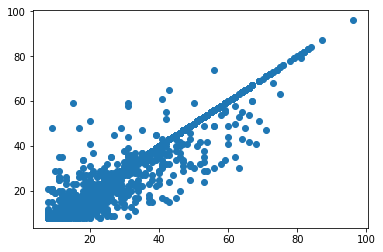

In [14]:
plt.scatter(Nstar2,Nstar)

In [15]:
np.allclose(Nstar2,Nstar)

False

In [29]:
fdp.free_energy(Nstar[0],Vols[0])

4.32238245010376